# _`expression`_.`derived_term(`_`algo`_`="expansion")`

Generate the derived-term automaton from an expression.

The algorithm can be:
- `"derivation"`: rely on the `expression.derivation`.
- `"breaking_derivation"`: likewise, but `split` the polynomials at each step
- `"expansion"`: rely on the `expression.expansion`.
- `"breaking_expansion"`: likewise, but `split` the polynomials at each step

Also known as:
- Antimirov automaton
- Partial-derivatives automaton

See also:
- [_expression_.derivation](expression.derivation.ipynb)
- [_expression_.expansion](expression.expansion.ipynb)

References:
- [antimirov.1996.tcs](References.ipynb#antimirov.1996.tcs) introduces the concept of derived-term automaton
- [lombardy.2005.tcs](References.ipynb#lombardy.2005.tcs) defines the derived-term construction for weighted automata (and coins the name "derived-term").
- [angrand.2010.jalc](References.ipynb#angrand.2010.jalc) defines its breaking variant

## Examples

In [1]:
import vcsn

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

### Classical Expressions

In the classical case (labels are letters, and weights are Boolean), this is the construct as described by Antimirov.

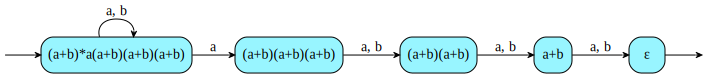

In [2]:
b = vcsn.context('lal_char(ab), b')
r = b.expression('[ab]*a[ab]{3}')
a = r.derived_term()
a

The resulting automaton has its states decorated by their expressions, which can be stripped:

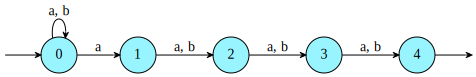

In [3]:
a.strip()

The result does not depend on the core computation: expansions and derivations compute the same terms:

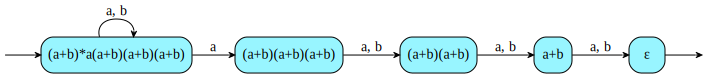

In [4]:
r.derived_term('derivation')

### Extended Rational Expressions

Extended expressions are supported.  For instance, words starting with `a`s and then `b`s, but not exactly `ab`:

In [5]:
r = b.expression('a*b*&(ab){c}')
r

a*b*&(ab){c}

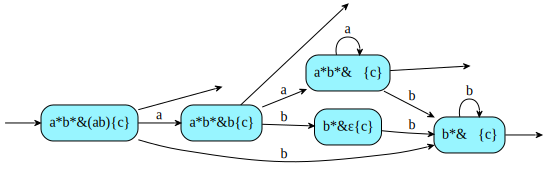

In [6]:
a = r.derived_term()
a

In [7]:
a.shortest(10)

\e + a + b + aa + bb + aaa + aab + abb + bbb + aaaa

### Weighted Expressions

The following example is taken from [lombardy.2005.tcs](References.ipynb#lombardy.2005.tcs):

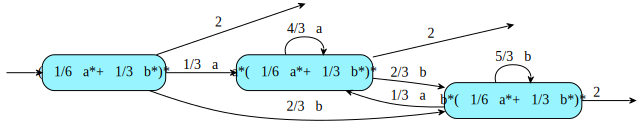

In [8]:
q = vcsn.context('lal_char(abc), q')
r = q.expression('(<1/6>a*+<1/3>b*)*')
r.derived_term()

### Broken derived-term automaton

"Breaking" variants of derivation and expansion "split" the polynomials at each step.  In short, it means that no state will be labeled by an addition: rather the addition is split into several states.  As a consequence, the automaton might have several initial states.

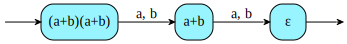

In [9]:
r = q.expression('[ab]{2}')
r.derived_term()

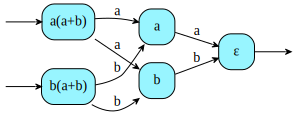

In [10]:
r.derived_term('breaking_expansion')